<a href="https://colab.research.google.com/github/Vikashbaabhu/CVIP-Data-Science/blob/House-price-prediction/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps

In [ ]:
#1. Take the data and create dataframe
#2. Filtering the Data (Data Cleaning, Dropping)
#3. Data Visualisation
#4. Divide the data into input and output
#5. Train and Test variables
#6. Running Regressor
#7. Fit the model
#8. Predict the Output
#9. Evaluating the Accuracy Score

#1. Take the data and create dataframe

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,guestroom,hotwaterheating,airconditioning
0,13300000,7420,4,2,0,0,1
1,12250000,8960,4,4,0,0,1
2,12250000,9960,3,2,0,0,0
3,12215000,7500,4,2,0,0,1
4,11410000,7420,4,1,1,0,1
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,0,0,0
541,1767150,2400,3,1,0,0,0
542,1750000,3620,2,1,0,0,0
543,1750000,2910,3,1,0,0,0


#2. Filtering the Data

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,guestroom,hotwaterheating,airconditioning
0,13300000,7420,4,2,0,0,1
1,12250000,8960,4,4,0,0,1
2,12250000,9960,3,2,0,0,0
3,12215000,7500,4,2,0,0,1
4,11410000,7420,4,1,1,0,1


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,guestroom,hotwaterheating,airconditioning
540,1820000,3000,2,1,0,0,0
541,1767150,2400,3,1,0,0,0
542,1750000,3620,2,1,0,0,0
543,1750000,2910,3,1,0,0,0
544,1750000,3850,3,1,0,0,0


In [ ]:
df.shape

(545, 7)

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'guestroom',
       'hotwaterheating', 'airconditioning'],
      dtype='object')

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,guestroom,hotwaterheating,airconditioning
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.177982,0.045872,0.315596
std,1.870440e+06,2170.141023,0.738064,0.502470,0.382849,0.209399,0.465180
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,0.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df.nunique()

price              219
area               284
bedrooms             6
bathrooms            4
guestroom            2
hotwaterheating      2
airconditioning      2
dtype: int64

In [ ]:
df.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
guestroom          0
hotwaterheating    0
airconditioning    0
dtype: int64

#3. Data Visualisation

<Axes: >

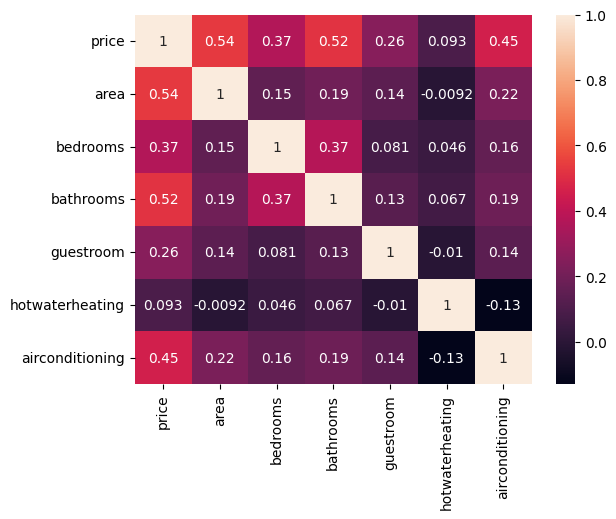

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

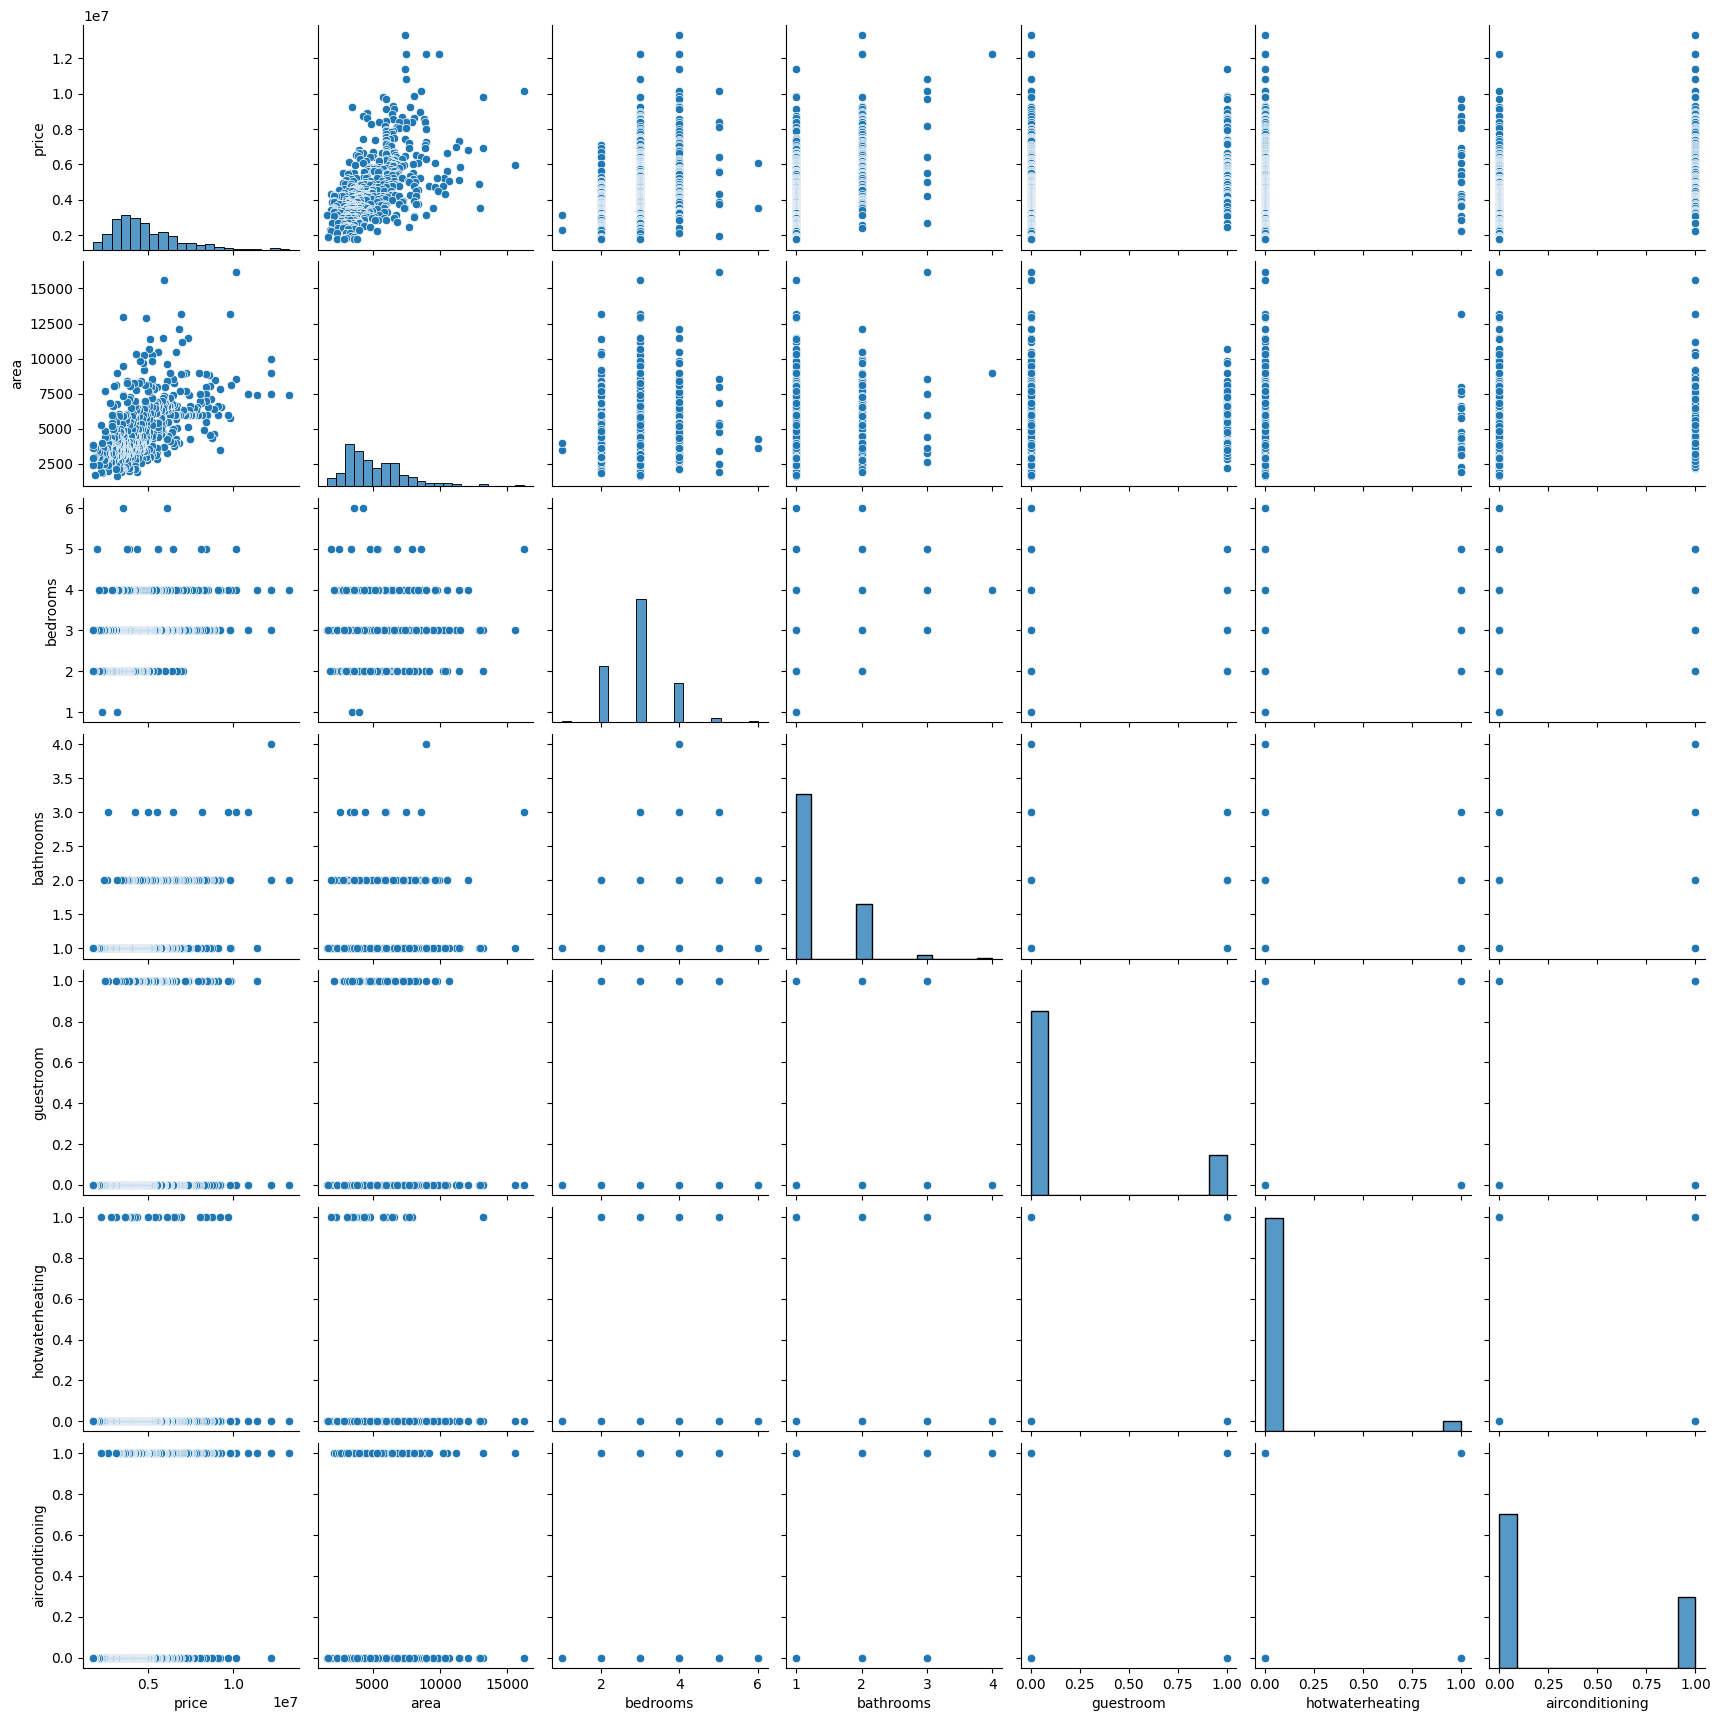

In [ ]:
sns.pairplot(df)

In [ ]:
import plotly.express as px

fig = px.pie(df,values='price',names='bedrooms')
fig.show()

#4. Divide the data into input and output

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   guestroom        545 non-null    int64
 5   hotwaterheating  545 non-null    int64
 6   airconditioning  545 non-null    int64
dtypes: int64(7)
memory usage: 29.9 KB


In [ ]:
# Input

x = df.drop(["price"], axis = 1)
x

,area,bedrooms,bathrooms,guestroom,hotwaterheating,airconditioning
0,7420,4,2,0,0,1
1,8960,4,4,0,0,1
2,9960,3,2,0,0,0
3,7500,4,2,0,0,1
4,7420,4,1,1,0,1
...,...,...,...,...,...,...
540,3000,2,1,0,0,0
541,2400,3,1,0,0,0
542,3620,2,1,0,0,0
543,2910,3,1,0,0,0


In [ ]:
#Output

y = df['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

#5. Train and Test variables

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

In [ ]:

#After train_test_split ,

# Training varaibles get 80% data of x and y
# Testing variables get 20% data from x and y


In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(545, 6)
(436, 6)
(109, 6)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(545,)
(436,)
(109,)


#6. Running Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 7. Fit the model

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

#8. Predict the Output

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([5633322.66222445, 6660487.17670806, 3322267.96673765,
       4973960.8603872 , 3558604.62389232, 4364604.58351589,
       6001902.83787814, 5903995.1750869 , 3625063.66639669,
       3190648.1205859 , 8776089.27096313, 3291312.89582457,
       4340464.80283832, 3307459.70893714, 3561524.9136011 ,
       6495619.65987146, 2726528.86614632, 5265989.83126531,
       4110539.37885194, 3894644.74965874, 4979801.43980477,
       6043332.60860127, 3208084.63912431, 4048298.86491334,
       4811408.90895939, 6559261.30916465, 3581259.32076498,
       5063158.54821455, 7368598.42158768, 3018557.83702442,
       5930414.74951279, 3313300.28835471, 7050891.56763053,
       4333941.54157369, 4056307.20998288, 6105632.13203966,
       4295355.37427622, 4702167.10821396, 4530076.82465248,
       4724236.4758809 , 4732561.0868223 , 4314182.19545929,
       6637124.85903781, 3628691.57690306, 4113666.47781732,
       4972707.52478942, 6514472.69126901, 4016883.29891434,
       4493304.13995886,

In [ ]:
# ACTUAL OUTPUT VALUES
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [ ]:
model.predict([[7460,2,4,1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([9714520.61029505])

#9. Evaluating the Accuracy Score

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(y_test,y_pred)

In [ ]:
print('Linear Regression model performance')
print('-----------------------------------')
print('MSE is',mse)
print('RMSE is',rmse)
print('R2 score is',r2)

Linear Regression model performance
-----------------------------------
MSE is 2298582192411.691
RMSE is 1516107.5794321757
R2 score is 0.5452467607771176


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(y_test,y_pred)

In [ ]:
print('Random Forest Regressor model performance')
print('-----------------------------------------')
print('MSE is',mse)
print('RMSE is',rmse)
print('R2 score is',r2)

Random Forest Regressor model performance
-----------------------------------------
MSE is 2163623267140.1511
RMSE is 1470925.9896881797
R2 score is 0.5719471366139628
